## Beyond Stoner-Wohlfarth Single-grain easy axis model
This notebook showcases how to train a ML surrogate model for micromagnetic simulations, where the external magnetic field H and the anisotropy axis K1 are aligned in z-direction.

In [1]:
import sys
from pathlib import Path
import os

# Get project root (parent of notebooks/)
PROJECT_ROOT = Path.cwd().parent.resolve()

# Add project root to Python path so src/ is importable
sys.path.insert(0, str(PROJECT_ROOT))

# Change working directory to project root
os.chdir(PROJECT_ROOT)

In [2]:
from scripts.analyze_magnetic_data import analyze_magnetic_data

## Training data generation

The training data has been created using micromagnetic simulations with the [Mammos-Mumag package](https://github.com/MaMMoS-project/mammos-mumag). One hysteresis loop for a cube of 50nm edge length was computed for each combination of material parameters A, Ms, K from the hysteresis loops, Hc, Mr and BHmax are computed. This is the input data for the ML model, available at data/magnetic_materials.csv. In total 1497 data points were computed.

## Data Pre-Processing

Prior to fitting a machine learning model, the dataset is analyzed.

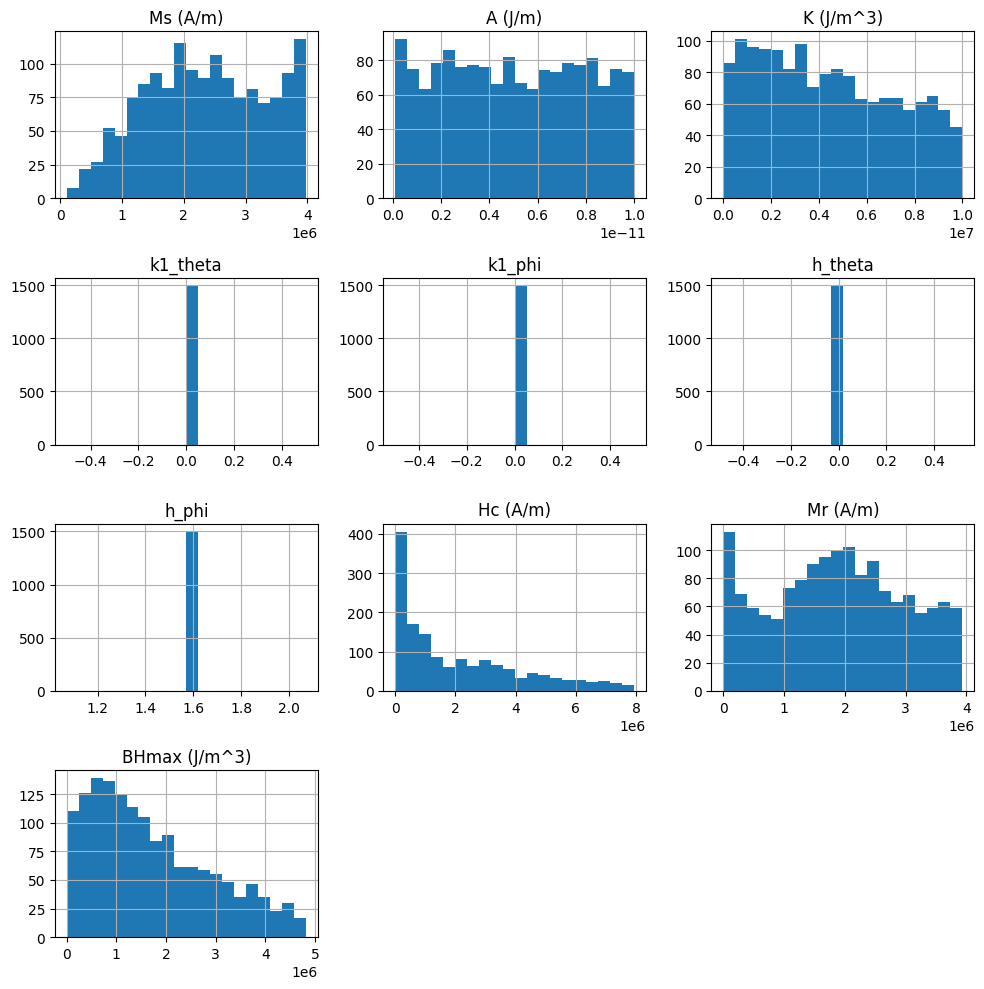

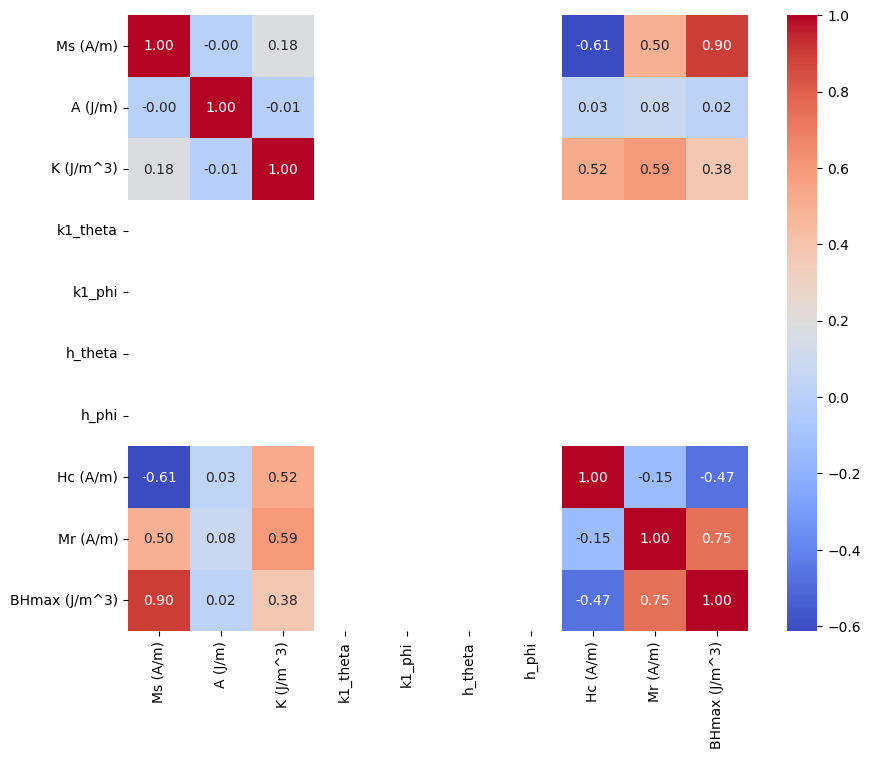

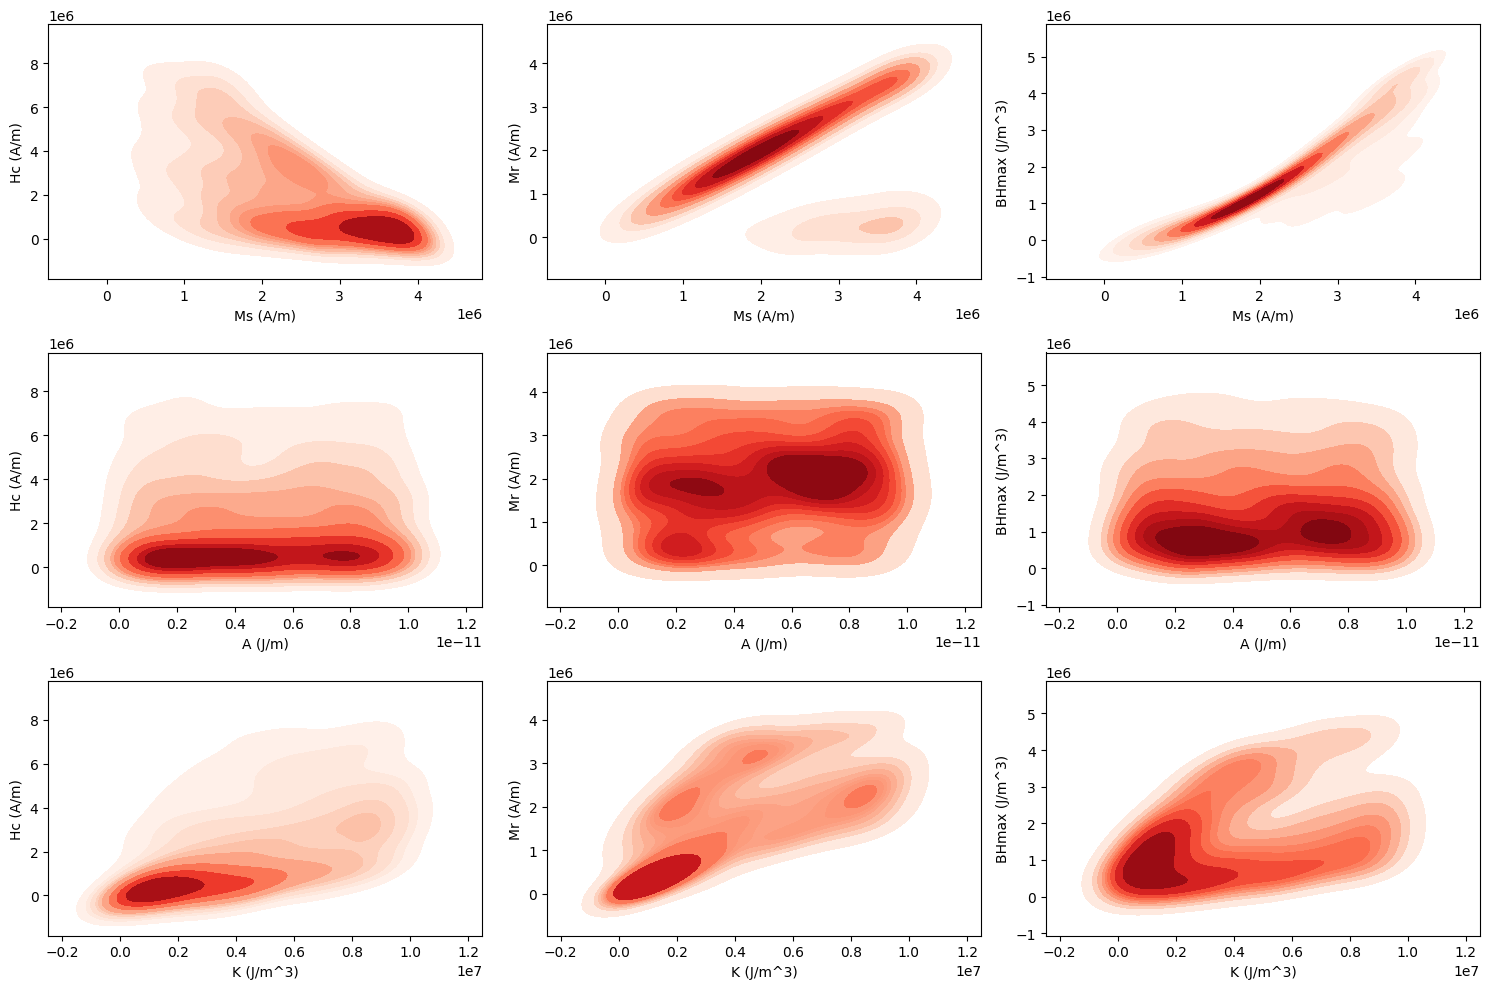

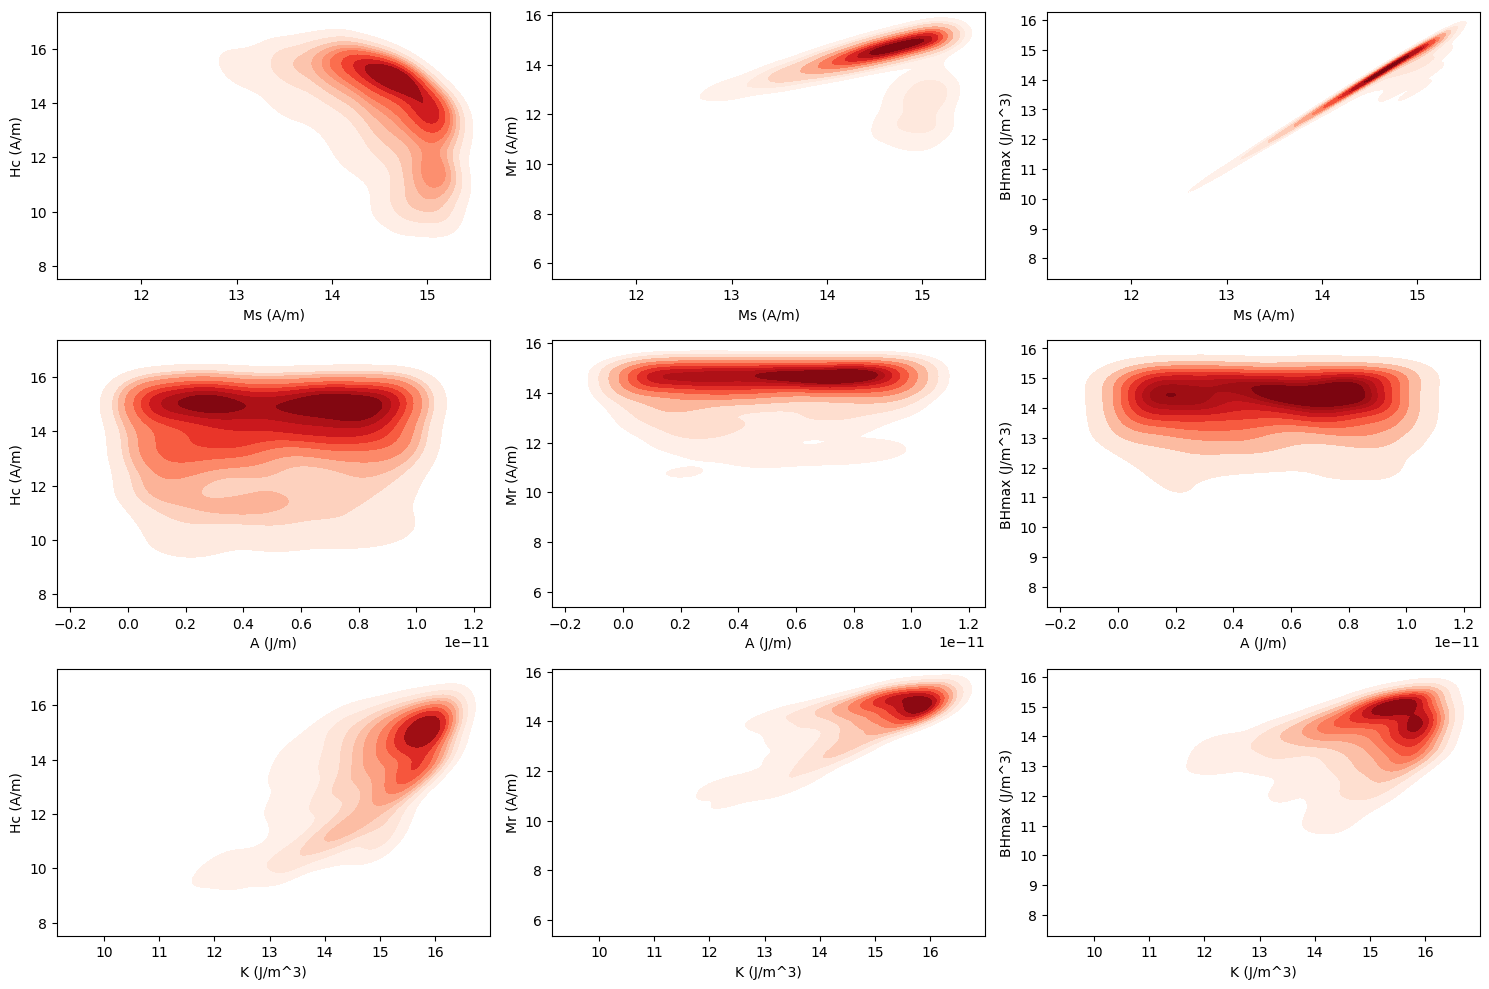

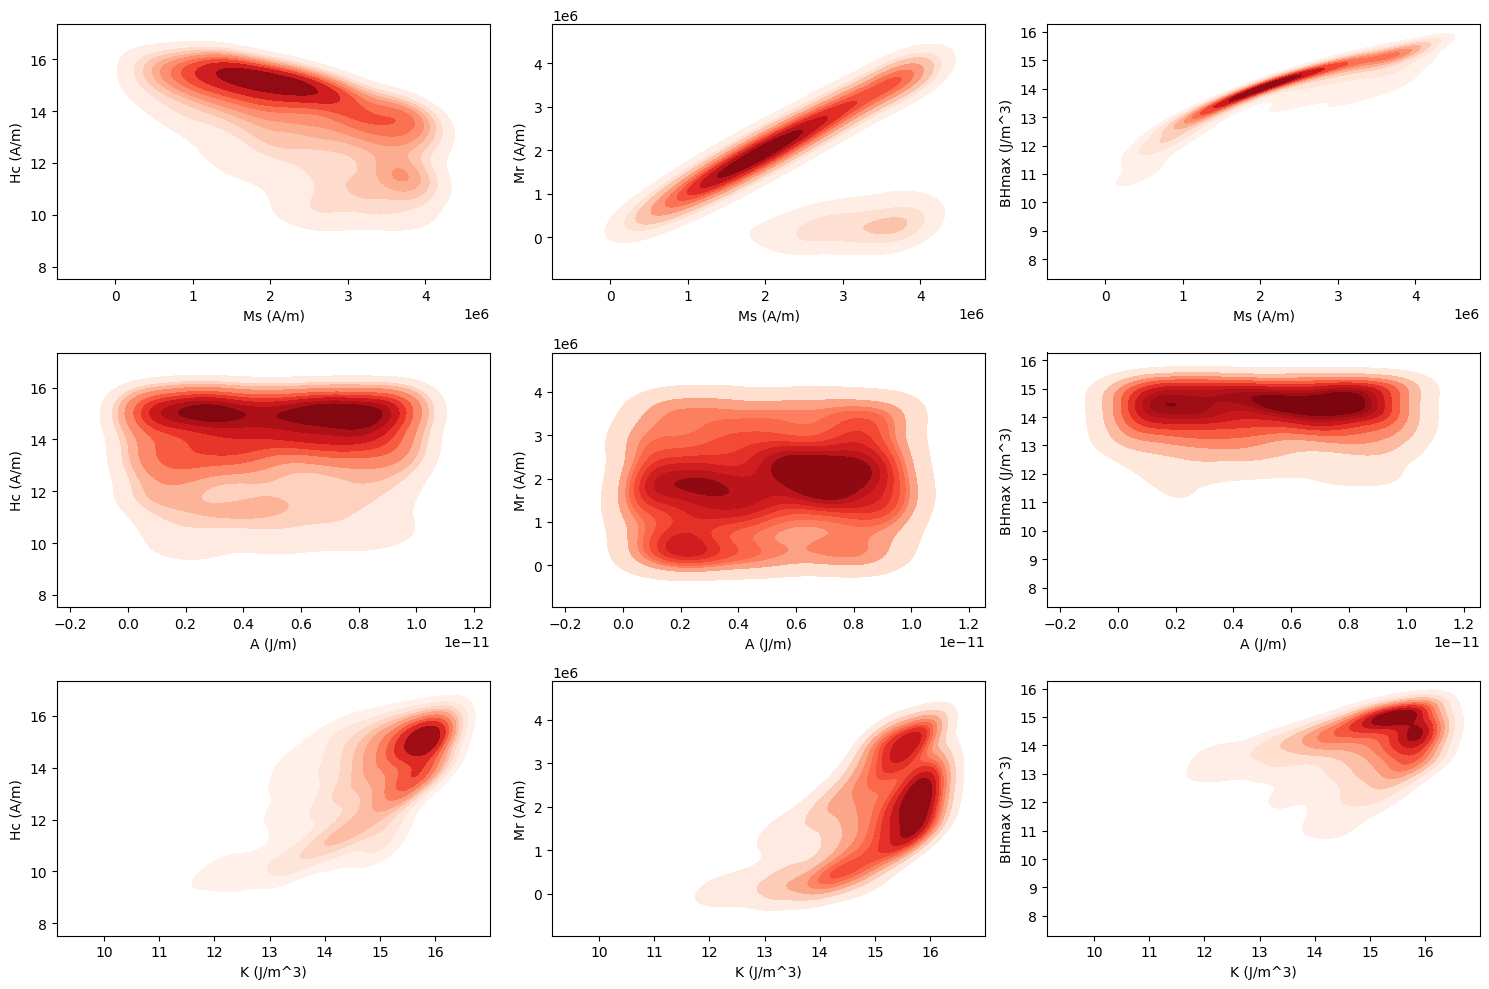

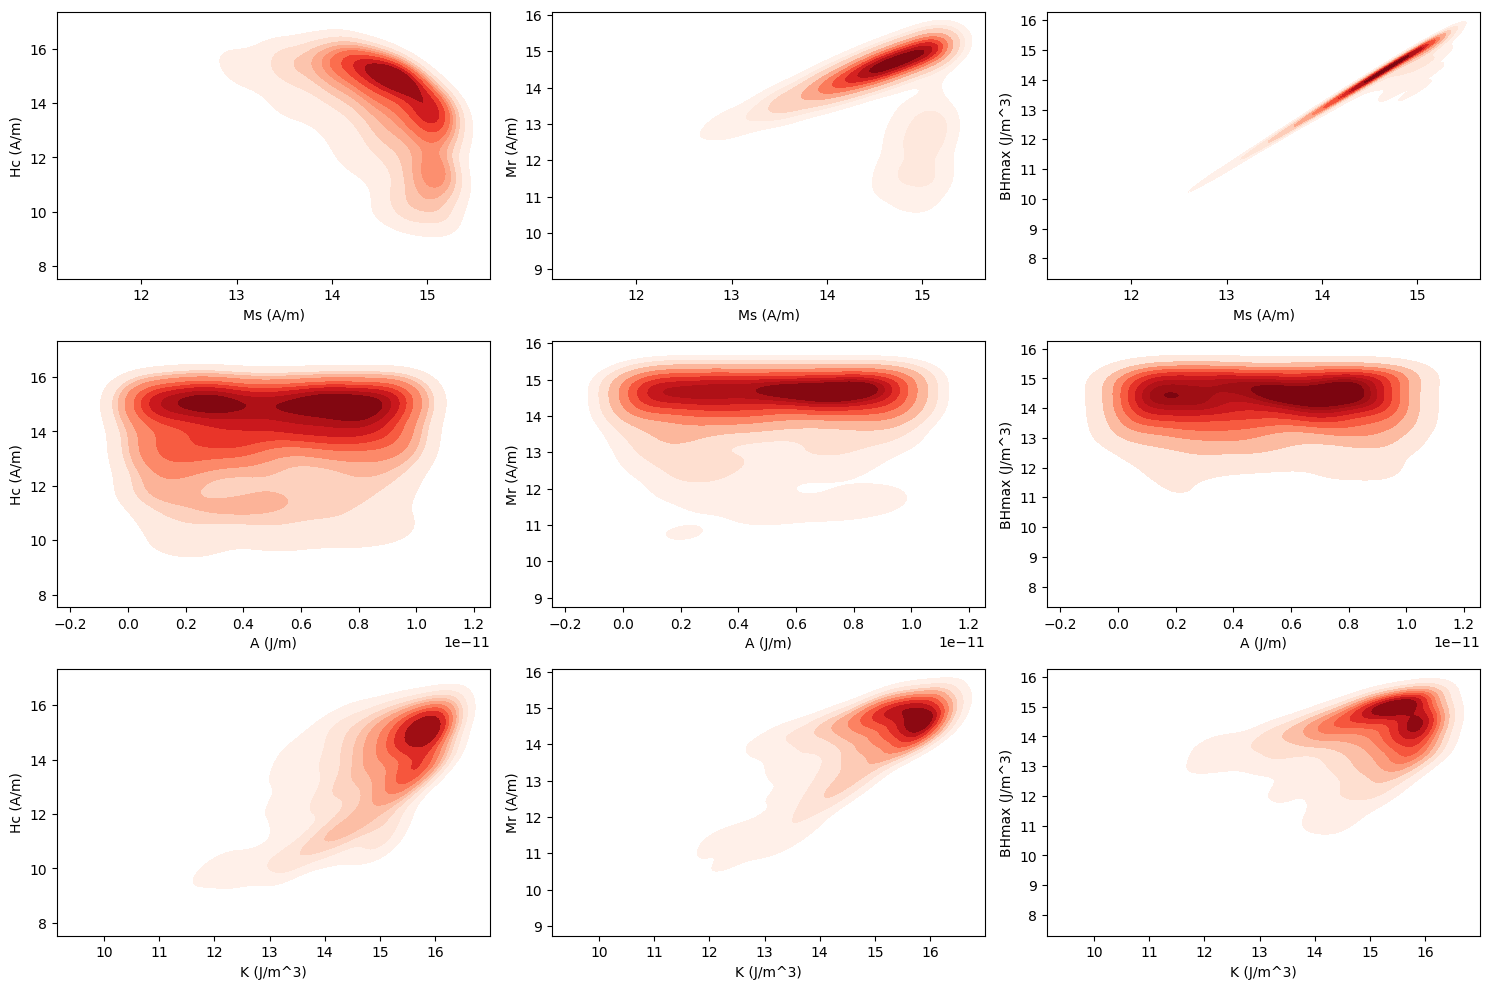

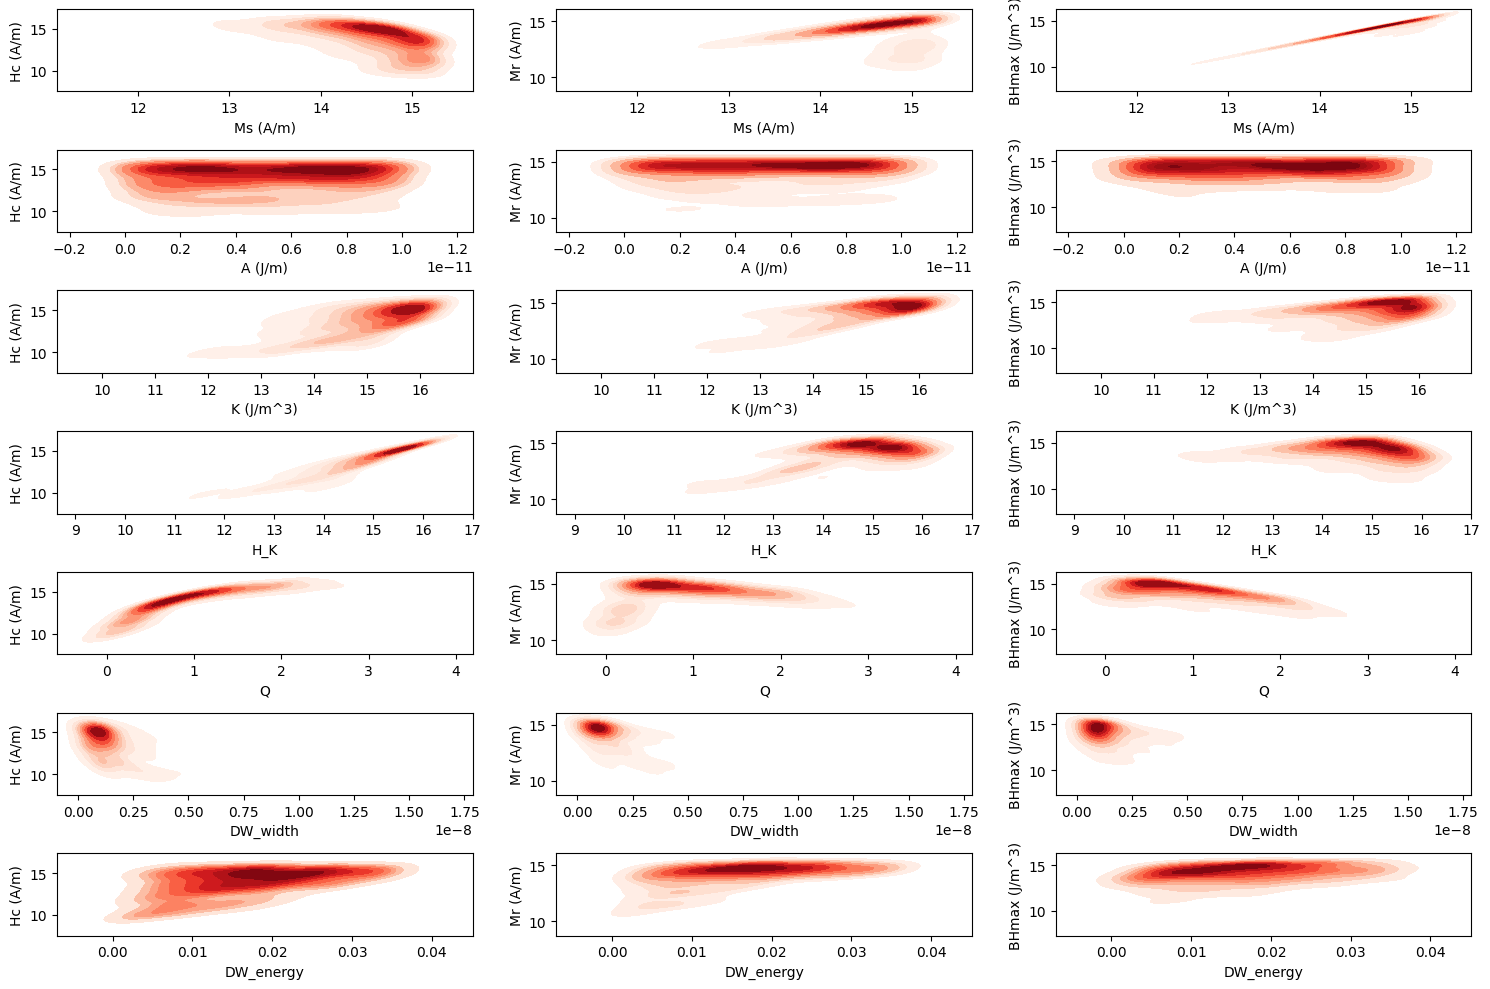

In [3]:
analyze_magnetic_data(data_path='data/magnetic_materials.csv')

### Model training

In [4]:
from scripts.train_model import MLPipeline
import argparse

In [5]:
configpath = 'config/ml_config_test.yaml'

In [6]:
pipeline = MLPipeline(configpath)

In [7]:
pipeline.run()

### Plot Metrics

In [8]:
from scripts.plot_metrics import *

In [9]:
results_dir = 'results/'

In [10]:
output = 'results/metric_tables'

In [11]:
# Set matplotlib style
plt.style.use('ggplot')

In [12]:
# Set default output directory as a subdirectory of the input directory
results_path = Path(results_dir)
if output is None:
    output_path = results_path / "metric_tables"
else:
    output_path = Path(output)

In [13]:
# Create output directory
output_path.mkdir(parents=True, exist_ok=True)

In [14]:
# Load results
results = load_results(results_dir)

In [15]:
# Create tables
create_metric_tables(results, output_path)
        
print(f"Tables and plots generated successfully in {output_path}")

Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Overall_metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Mr__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Hc__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_BHmax__J_m_3__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_Overall_metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_Mr__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_Hc__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_BHmax__J_m_3__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Overall_metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Mr__A_m__metri